In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# loading data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # this is normalization values from the mnist data set
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


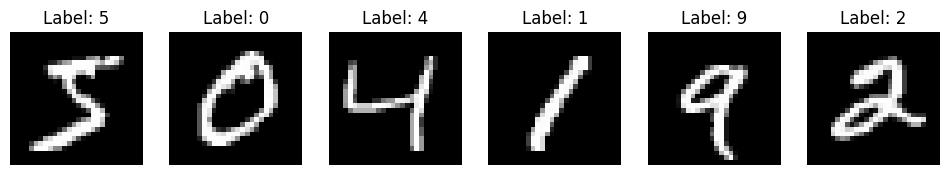

In [5]:
import matplotlib.pyplot as plt

# visualizing
def show_images(dataset):
    fig, ax = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        image, label = dataset[i]
        ax[i].imshow(image.squeeze(), cmap='gray')
        ax[i].set_title(f"Label: {label}")
        ax[i].axis('off')
    plt.show()

show_images(train_dataset)



In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# creating a model
class ImageModel(nn.Module):
    def __init__(self):
        super(ImageModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# training the model
model = ImageModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# training loop
for epoch in range(1, 4):
    model.train()
    total_loss = 0
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        # forward pass
        optimizer.zero_grad()
        output = model(data)

        # backward pass
        loss = criterion(output, target)
        loss.backward()

        #optimization
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch}, Loss: {total_loss}")



Epoch 1, Loss: 252.17107505910099
Epoch 2, Loss: 104.21642126329243
Epoch 3, Loss: 73.78366665588692


In [7]:
# getting metrics
def test(model,loader,dataset):
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()
    print(f"test Accuracy: {correct / len(dataset) * 100:.2f}%")


In [8]:
test(model,train_loader,train_dataset)

test Accuracy: 97.30%


In [9]:
test(model,test_loader,test_dataset)

test Accuracy: 96.49%
